# Plotting

This file is responsible for plotting the results of the models.
The data should be shown in an easy-to-understand manner and all plots should have some guidance
on interpretation and background.

Follow the following guidance:
- Make all assumptions clear.
- Do not hardcode any variables. All must be visible in the sources tab.
- No data computations may be done and only data from ../results may be accessed.

In [ ]:
from pathlib import Path
import sys

# Set matlplotlib to inline mode
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [105]:
# Import the configurations
from configs import PLOTTING_CONFIG
from src.plotting import PLOTTER, import_plotting_data

plotter: PLOTTER = PLOTTER(PLOTTING_CONFIG)

# Import the Data

In [106]:
# Import files and set index

(monthly_factor_loadings,
monthly_predicted_returns,
factor_loadings_overtime) =  import_plotting_data()

/Users/matswalker/Downloads/FinalThesis/src/plotting/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  factor_loadings_overtime: pd.DataFrame = pd.read_csv(


# Predicted vs Actual returns entire period

In [107]:
print(monthly_predicted_returns)

           AGRICULTURAL PRODUCTION-CROPS                                \
                          Actual_returns Pred_returns Residual_returns   
date                                                                     
2008-01-01                      0.000000     0.008934         0.008934   
2008-02-01                      0.034629     0.000806        -0.033822   
2008-03-01                     -0.033577     0.005392         0.038968   
2008-04-01                      0.019143    -0.013496        -0.032639   
2008-05-01                     -0.094824     0.005210         0.100034   
...                                  ...          ...              ...   
2025-07-01                      0.055034    -0.002773        -0.057807   
2025-08-01                     -0.042870     0.010154         0.053024   
2025-09-01                     -0.061665    -0.002233         0.059432   
2025-10-01                     -0.065718     0.000139         0.065857   
2025-11-01                      0.0007

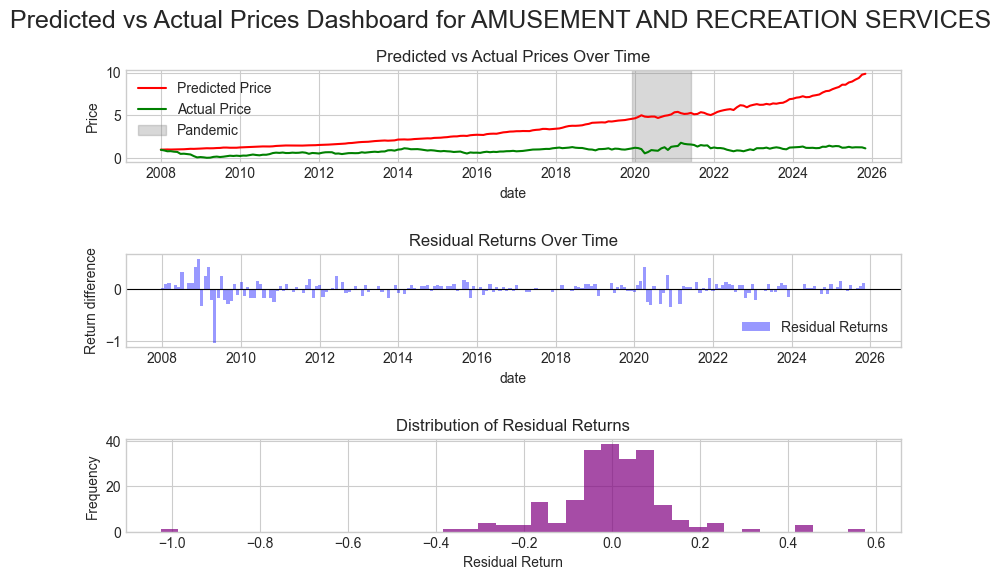

In [108]:
plotter.plot_dashboard_pred_vs_actual_prices(monthly_predicted_returns["AMUSEMENT AND RECREATION SERVICES"], 
                                     asset_name="AMUSEMENT AND RECREATION SERVICES")

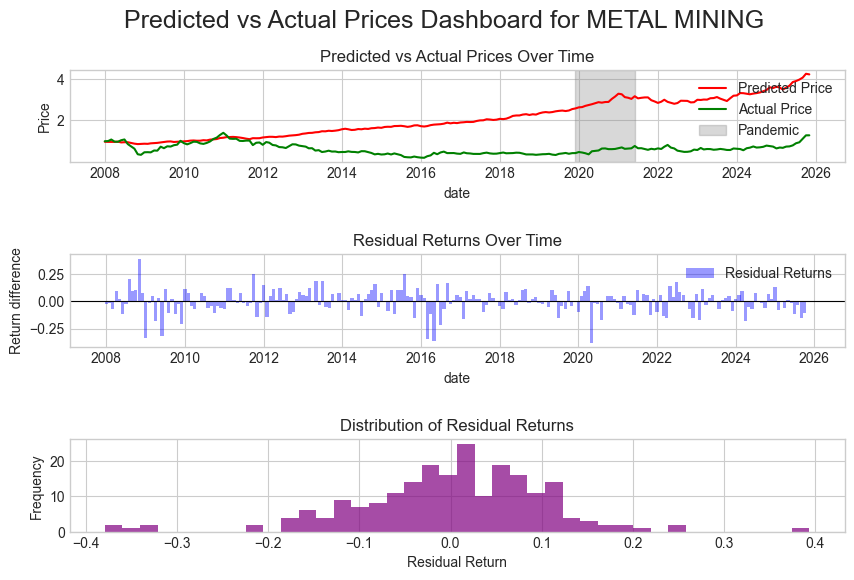

In [109]:
plotter.plot_dashboard_pred_vs_actual_prices(monthly_predicted_returns["METAL MINING"], "METAL MINING")

# Factor loadings entire period

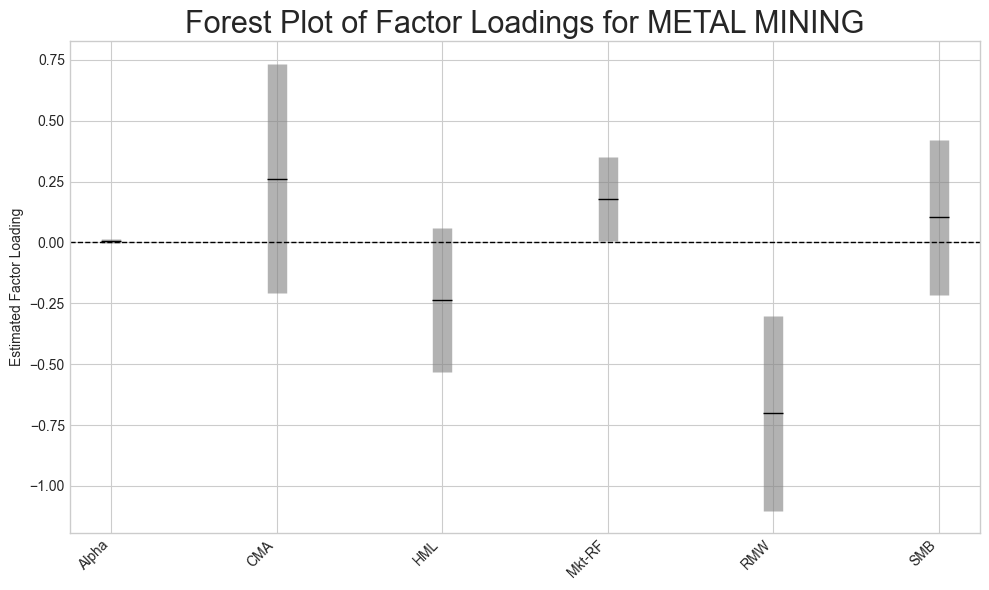

In [110]:
plotter.plot_factor_loadings(
    factor_loadings=monthly_factor_loadings,
    asset_identifier="METAL MINING",
    asset_name="METAL MINING")

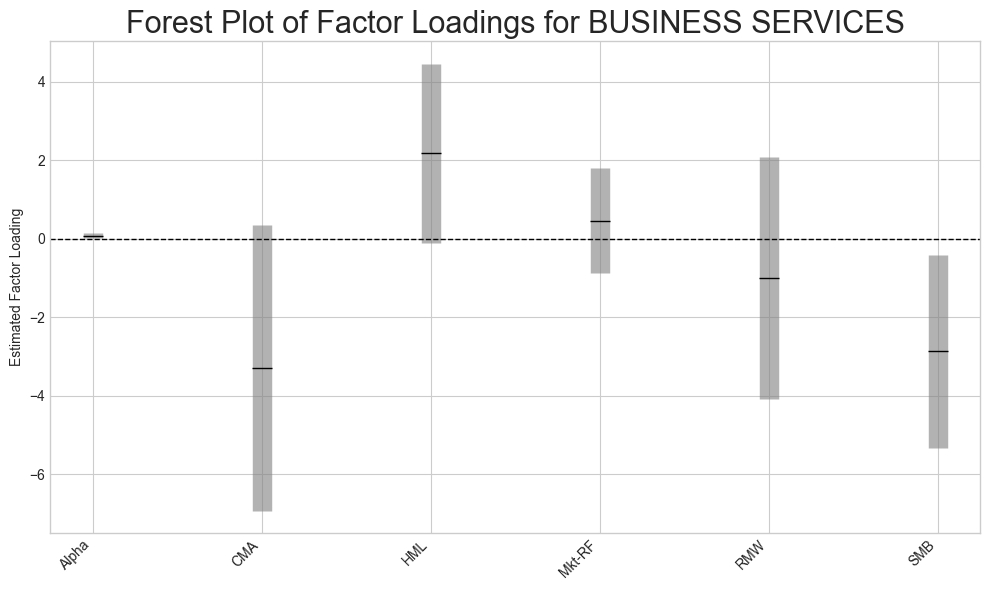

In [111]:
plotter.plot_factor_loadings(
    factor_loadings=monthly_factor_loadings,
    asset_identifier="BUSINESS SERVICES - Small Cap",
    asset_name="BUSINESS SERVICES")

## Factor Loadings Small vs Large cap

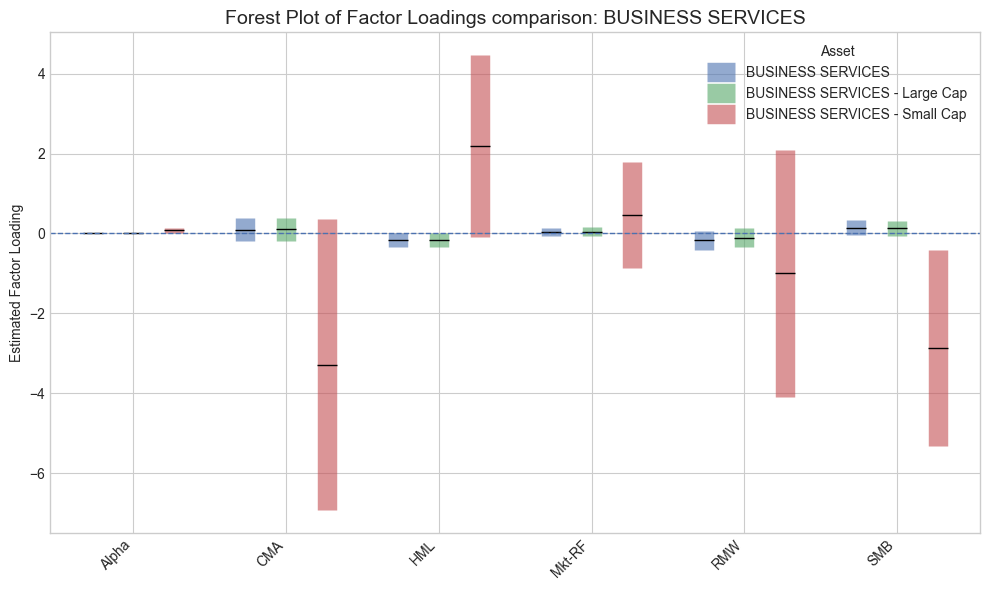

In [112]:
plotter.compare_factor_loadings_small_large(
    factor_loadings=monthly_factor_loadings,
    asset_identifier="BUSINESS SERVICES",
    asset_name="BUSINESS SERVICES")

# Factor loadings over time

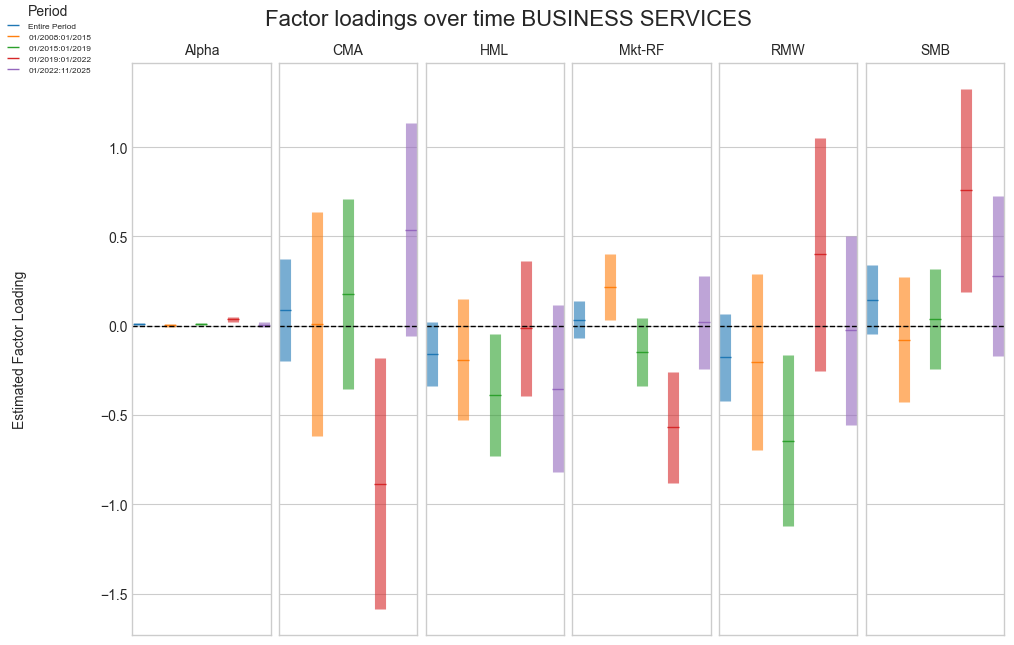

In [113]:
plotter.plot_factor_loadings_over_time(
    factor_loadings_over_time=factor_loadings_overtime,
    asset_identifier="BUSINESS SERVICES",
    asset_name="BUSINESS SERVICES"
)